### Exercise: Validation and learning curves

#### Train and test SVM classifier (30 min,  2 people / breakout room)

The aim of this exercise is to:
* train and test a support vector machine classifier through cross-validation;
* study the effect of the parameter gamma (one of the parameters controlling under/over-fitting in SVM) using a validation curve;
* determine the usefulness of adding new samples in the dataset when building a classifier using a learning curve. 

We will use blood transfusion dataset located in `../datasets/blood_transfusion.csv`. First take a data exploration to get familiar with the data.

You can then start off by creating a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Script below will help you get started:

```python=
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())
```

You can vary gamma between 10e-3 and 10e2 by generating samples on a logarithmic scale with the help of

```python=
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
```

To manipulate training size you could use:

```python=
train_sizes = np.linspace(0.1, 1, num=10)
```


### Read the data

In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")

In [3]:
blood_transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


### Separate data and target

In [4]:
data, target = blood_transfusion.drop(columns="Class"), blood_transfusion["Class"]

### Make pipeline

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model1 = make_pipeline(StandardScaler(), SVC())

In [6]:
model1

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### train and test a support vector machine classifier through cross-validation

In [7]:
from sklearn.model_selection import cross_validate

cv_result_svm1 = cross_validate(model1, data, target, cv=5)

svm1_mean = cv_result_svm1['test_score'].mean()
svm1_std = cv_result_svm1['test_score'].std()

print("SVM avg score {} with std of {}".format(round(svm1_mean,3), round(svm1_std,3)))

SVM avg score 0.759 with std of 0.038


### Effect of the parameter gamma (one of the parameters controlling under/over-fitting in SVM) using a validation curve

In [8]:
import numpy as np

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"

In [9]:
gammas

array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])

In [10]:
for gamma in gammas:
    model = make_pipeline(StandardScaler(), SVC(gamma=gamma))
    cv_result = cross_validate(model, data, target, cv=5)

    svm_mean = cv_result['test_score'].mean()
    svm_std = cv_result['test_score'].std()

    print("SVM gamma {}: avg {} std: {}".format(round(gamma,3), round(svm_mean,3), round(svm_std,3)))

SVM gamma 0.001: avg 0.762 std: 0.002
SVM gamma 0.001: avg 0.762 std: 0.002
SVM gamma 0.002: avg 0.762 std: 0.002
SVM gamma 0.003: avg 0.762 std: 0.002
SVM gamma 0.005: avg 0.762 std: 0.002
SVM gamma 0.007: avg 0.762 std: 0.002
SVM gamma 0.011: avg 0.765 std: 0.005
SVM gamma 0.016: avg 0.763 std: 0.007
SVM gamma 0.024: avg 0.763 std: 0.006
SVM gamma 0.036: avg 0.763 std: 0.006
SVM gamma 0.053: avg 0.769 std: 0.014
SVM gamma 0.079: avg 0.767 std: 0.017
SVM gamma 0.117: avg 0.781 std: 0.029
SVM gamma 0.174: avg 0.759 std: 0.025
SVM gamma 0.259: avg 0.759 std: 0.038
SVM gamma 0.386: avg 0.755 std: 0.043
SVM gamma 0.574: avg 0.754 std: 0.04
SVM gamma 0.853: avg 0.753 std: 0.041
SVM gamma 1.269: avg 0.739 std: 0.067
SVM gamma 1.887: avg 0.725 std: 0.099
SVM gamma 2.807: avg 0.718 std: 0.103
SVM gamma 4.175: avg 0.713 std: 0.101
SVM gamma 6.21: avg 0.705 std: 0.103
SVM gamma 9.237: avg 0.705 std: 0.087
SVM gamma 13.738: avg 0.701 std: 0.088
SVM gamma 20.434: avg 0.698 std: 0.087
SVM gamma 30

### Plot a validation curve
This distinguishes train- and test-accuracy.

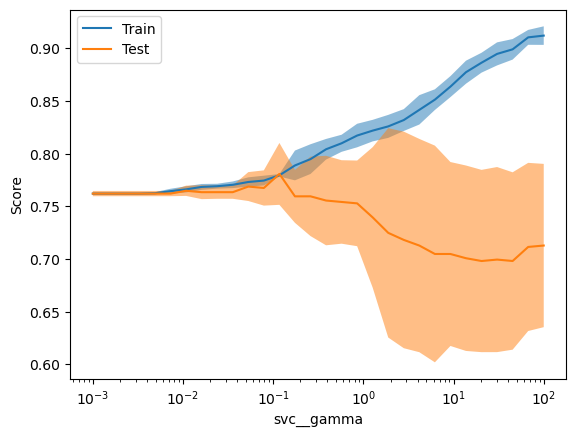

In [13]:
from sklearn.model_selection import ValidationCurveDisplay
from numpy import logspace
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="svc__gamma",
    param_range=gammas
)

### TODO: Determine the usefulness of adding new samples in the dataset when building a classifier using a learning curve.
#### Manipulate train sizes

In [25]:
train_sizes = np.linspace(0.1, 1, num=10)
train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])